In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Potato Disease Dataset

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d ashokkumarpalivela/potato-diseases

 95% 36.0M/37.8M [00:01<00:00, 27.0MB/s]
100% 37.8M/37.8M [00:01<00:00, 20.4MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/potato-diseases.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  kaggle.json  potato-diseases.zip	sample_data


**Importing the Dependencies**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
early_blight = os.listdir('/content/data/Early_blight')
print(early_blight[0:5])
print(early_blight[-5:])

['84546db4-ea7c-4357-bf3d-6afcae9a05bf___RS_Early.B 7637.JPG', '8435fd63-0136-44f9-8dd4-6ca27bcddd97___RS_Early.B 7017.JPG', '4bba904e-b4af-4a81-8252-b8d997bc5057___RS_Early.B 7695.JPG', '26d0502d-5fb3-48fa-a86d-d1de92703285___RS_Early.B 6959.JPG', '82654962-5b0d-44ed-9ca4-84be55ba23a6___RS_Early.B 6877.JPG']
['212c3c65-e30e-496f-ab5e-c2f4b0446d8f___RS_Early.B 8195.JPG', '686938d8-5fcc-4482-850f-0e8720206046___RS_Early.B 7769.JPG', '3a97c74a-3d6e-4cd9-86e0-10a8e716e7b5___RS_Early.B 8422.JPG', '64cab763-3fa2-483c-abc6-1d203f26f88e___RS_Early.B 6671.JPG', '68f056c9-4989-4809-b597-3739ff66afc3___RS_Early.B 8748.JPG']


In [ ]:
healthy = os.listdir('/content/data/Healthy')
print(healthy[0:5])
print(healthy[-5:])

['2d98cbc8-cbe6-423c-b2ab-3f7f8bcea5d5___RS_HL 1945.JPG', 'b9ea902d-e557-4fa5-893b-39a7a57c0121___RS_HL 1893.JPG', 'b925ad3e-fc49-497d-a6eb-115f0de20800___RS_HL 4170.JPG', 'a3ec91aa-8503-4711-a912-0d1427e25686___RS_HL 5409.JPG', '923d4cc3-021a-4bcd-9f5f-1d6f69e4ad33___RS_HL 1888.JPG']
['ee052892-e935-4fbb-9344-4d23c57c6890___RS_HL 5400.JPG', '762672f4-17e6-4fd6-84f1-3bcb091b3ca5___RS_HL 5417.JPG', '14484ea5-9c34-427c-abe4-2743265aced0___RS_HL 4204.JPG', '4ae82355-6885-40e7-9807-dabe46ed3441___RS_HL 5410.JPG', '07dfb451-4378-49d1-b699-33a5fc49ff07___RS_HL 5399.JPG']


In [ ]:
late_blight = os.listdir('/content/data/Late_blight')
print(late_blight[0:5])
print(late_blight[-5:])

['2f6382f7-12fc-4309-b7db-b034b8165c67___RS_LB 4955.JPG', 'b9302a2f-a369-4b05-aed6-632287f42ed7___RS_LB 4452.JPG', '8f12dae8-d44b-4d16-8815-4da5f9a9ff55___RS_LB 4283.JPG', '3f6bce87-fb66-44fb-8e76-e282af4869b9___RS_LB 3013.JPG', 'f18c34fd-e43a-4338-b3f3-6537f2f84f98___RS_LB 4111.JPG']
['6d51bd53-2556-410c-b151-547c83a06287___RS_LB 3276.JPG', 'a34d3777-22c7-4723-8b85-f766e042c121___RS_LB 4375.JPG', '0f824e18-3821-486c-81a1-f1f64cf6e767___RS_LB 4894.JPG', '127521ec-3cc5-4f98-ac73-ad561ec29e73___RS_LB 3219.JPG', 'e439b96c-2ff6-4d53-b8f0-1ed720536b0c___RS_LB 4449.JPG']


In [ ]:
print('Number of early_blight images:', len(early_blight))
print('Number of healthy images:', len(healthy))
print('Number of late_blight images:', len(late_blight))

Number of early_blight images: 1000
Number of healthy images: 152
Number of late_blight images: 1000


**Creating Labels for the two class of Images**

early_blight  -->  0

healthy  -->  1

late_blight --> 2

In [ ]:
# create the labels

early_blight = [0]*1000

healthy = [1]*152

late_blight = [2]*1000

In [ ]:
print(early_blight[0:5])

print(healthy[0:5])

print(late_blight[0:5])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]
[2, 2, 2, 2, 2]


In [ ]:
print(len(early_blight))
print(len(healthy))
print(len(late_blight))

1000
152
1000


In [ ]:
labels = early_blight + healthy + late_blight

print(len(labels))
print(labels[0:5])
print(labels[-5:])

2152
[0, 0, 0, 0, 0]
[2, 2, 2, 2, 2]


**Displaying the Images**

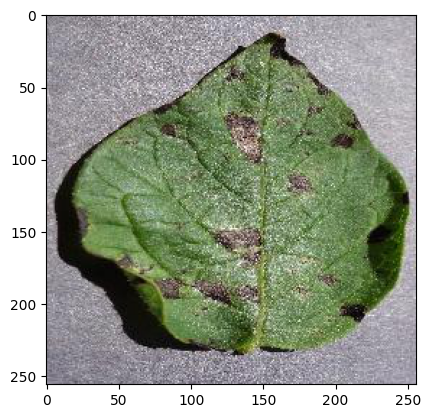

In [ ]:
# displaying early blight image
img = mpimg.imread('/content/data/Early_blight/84546db4-ea7c-4357-bf3d-6afcae9a05bf___RS_Early.B 7637.JPG')
imgplot = plt.imshow(img)
plt.show()

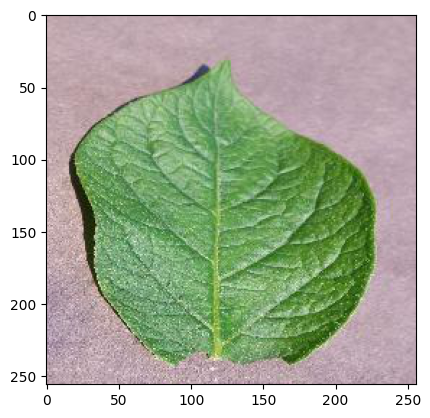

In [ ]:
# displaying healthy image
img = mpimg.imread('/content/data/Healthy/2d98cbc8-cbe6-423c-b2ab-3f7f8bcea5d5___RS_HL 1945.JPG')
imgplot = plt.imshow(img)
plt.show()

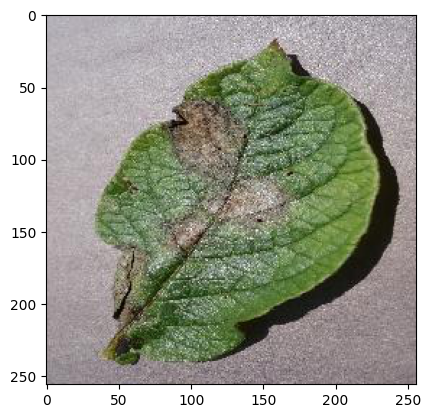

In [ ]:
# displaying late blight image
img = mpimg.imread('/content/data/Late_blight/2f6382f7-12fc-4309-b7db-b034b8165c67___RS_LB 4955.JPG')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays+

early_light_path = '/content/data/Early_blight/'

data = []

for img_file in os.listdir(early_light_path):

  image = Image.open(early_light_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



healthy_path = '/content/data/Healthy/'


for img_file in os.listdir(healthy_path):

  image = Image.open(healthy_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


late_blight_path = '/content/data/Late_blight/'

for img_file in os.listdir(late_blight_path):

  image = Image.open(late_blight_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
len(data)

2152

In [ ]:
data[0]

array([[[140, 137, 144],
        [130, 127, 134],
        [141, 138, 145],
        ...,
        [173, 170, 177],
        [175, 172, 179],
        [172, 169, 176]],

       [[141, 138, 145],
        [132, 129, 136],
        [139, 136, 143],
        ...,
        [169, 166, 173],
        [178, 175, 182],
        [172, 169, 176]],

       [[134, 131, 138],
        [141, 138, 145],
        [143, 140, 147],
        ...,
        [179, 176, 183],
        [177, 174, 181],
        [176, 173, 180]],

       ...,

       [[140, 136, 150],
        [129, 125, 139],
        [122, 118, 132],
        ...,
        [158, 154, 168],
        [162, 158, 172],
        [165, 161, 175]],

       [[134, 130, 144],
        [130, 126, 140],
        [130, 126, 140],
        ...,
        [174, 170, 184],
        [159, 155, 169],
        [169, 165, 179]],

       [[150, 146, 160],
        [143, 139, 153],
        [139, 135, 149],
        ...,
        [161, 157, 171],
        [164, 160, 174],
        [168, 164, 178]]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(2152, 128, 128, 3)
(2152,)


In [ ]:
print(Y)

[0 0 0 ... 2 2 2]


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2152, 128, 128, 3) (1721, 128, 128, 3) (431, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train[0]

array([[[128,  99, 103],
        [143, 114, 118],
        [136, 107, 111],
        ...,
        [130, 101, 103],
        [144, 115, 117],
        [140, 111, 113]],

       [[127,  98, 102],
        [125,  96, 100],
        [122,  93,  97],
        ...,
        [144, 115, 117],
        [136, 107, 109],
        [139, 110, 112]],

       [[127,  98, 102],
        [134, 105, 109],
        [123,  94,  98],
        ...,
        [139, 110, 112],
        [140, 111, 113],
        [135, 106, 108]],

       ...,

       [[161, 145, 146],
        [162, 146, 147],
        [153, 137, 138],
        ...,
        [180, 164, 165],
        [182, 166, 167],
        [179, 163, 164]],

       [[165, 149, 150],
        [165, 149, 150],
        [160, 144, 145],
        ...,
        [177, 161, 162],
        [180, 164, 165],
        [176, 160, 161]],

       [[169, 153, 154],
        [167, 151, 152],
        [160, 144, 145],
        ...,
        [175, 159, 160],
        [178, 162, 163],
        [173, 157, 158]]

In [ ]:
X_train_scaled[0]

array([[[0.50196078, 0.38823529, 0.40392157],
        [0.56078431, 0.44705882, 0.4627451 ],
        [0.53333333, 0.41960784, 0.43529412],
        ...,
        [0.50980392, 0.39607843, 0.40392157],
        [0.56470588, 0.45098039, 0.45882353],
        [0.54901961, 0.43529412, 0.44313725]],

       [[0.49803922, 0.38431373, 0.4       ],
        [0.49019608, 0.37647059, 0.39215686],
        [0.47843137, 0.36470588, 0.38039216],
        ...,
        [0.56470588, 0.45098039, 0.45882353],
        [0.53333333, 0.41960784, 0.42745098],
        [0.54509804, 0.43137255, 0.43921569]],

       [[0.49803922, 0.38431373, 0.4       ],
        [0.5254902 , 0.41176471, 0.42745098],
        [0.48235294, 0.36862745, 0.38431373],
        ...,
        [0.54509804, 0.43137255, 0.43921569],
        [0.54901961, 0.43529412, 0.44313725],
        [0.52941176, 0.41568627, 0.42352941]],

       ...,

       [[0.63137255, 0.56862745, 0.57254902],
        [0.63529412, 0.57254902, 0.57647059],
        [0.6       , 0

**Building a Convolutional Neural Networks (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 3

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
49/49 [==============================] - 12s 27ms/step - loss: 1.0537 - acc: 0.5271 - val_loss: 0.6504 - val_acc: 0.7861
Epoch 2/10
49/49 [==============================] - 1s 19ms/step - loss: 0.6191 - acc: 0.7636 - val_loss: 0.5202 - val_acc: 0.7919
Epoch 3/10
49/49 [==============================] - 1s 21ms/step - loss: 0.4356 - acc: 0.8540 - val_loss: 0.3714 - val_acc: 0.8613
Epoch 4/10
49/49 [==============================] - 1s 18ms/step - loss: 0.3789 - acc: 0.8663 - val_loss: 0.4129 - val_acc: 0.8439
Epoch 5/10
49/49 [==============================] - 1s 16ms/step - loss: 0.3058 - acc: 0.8824 - val_loss: 0.3401 - val_acc: 0.8555
Epoch 6/10
49/49 [==============================] - 1s 16ms/step - loss: 0.2540 - acc: 0.9076 - val_loss: 0.4130 - val_acc: 0.7977
Epoch 7/10
49/49 [==============================] - 1s 17ms/step - loss: 0.2392 - acc: 0.9128 - val_loss: 0.3631 - val_acc: 0.8497
Epoch 8/10
49/49 [==============================] - 1s 16ms/step - loss: 0.2107 - 

**Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

14/14 [==============================] - 0s 17ms/step - loss: 0.2387 - acc: 0.9397
Test Accuracy = 0.9396751523017883


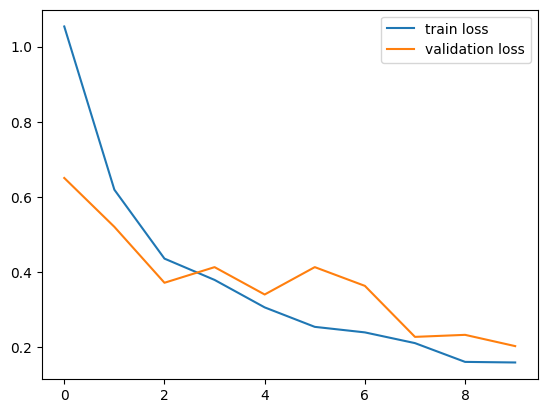

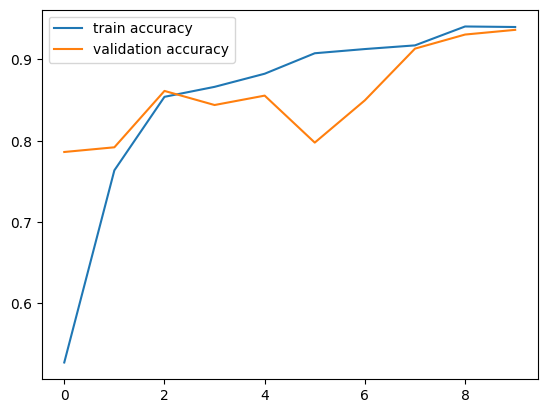

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/data/Early_blight/11e974fa-928f-45f6-b983-e74c74c7d163___RS_Early.B 7992.JPG


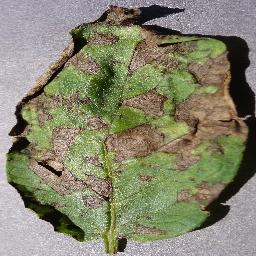

1/1 [==============================] - 0s 25ms/step
[[0.86352366 0.09510292 0.3516535 ]]
0
Early blight


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('Early blight')

elif input_pred_label ==1:

  print('Healthy')
else:
  print('late blight')